In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
#Метод динамического построения траектории
def plt_dynamic(x, y, fig, ax):
    ax.plot(x, y, "b")
    fig.canvas.draw()
#Расчёт площади треугольника по двум векторам с координатами (x1;y1), (x2;y2)
def getS(x1, y1, x2, y2):
    cos = (x1*x2+y1*y2)/(math.sqrt(x1**2+y1**2)*math.sqrt(x2**2+y2**2))
    sin = math.sqrt(1-cos**2)
    return math.sqrt(x1**2+y1**2)*math.sqrt(x2**2+y2**2)*sin

X0 = -100
Y0 = 0
G = 4.4613488e-46 #гравитационная постоянная (переведённая в а.е.^3*кг^(-1)*с^(-2))
M = 1.989e30
MIN_VALUE = -999999999999
MAX_VALUE = 999999999999

def PLOT(V0 = 0.0000000133692, DT = 3.3e8, N = 100, xlim_l = -120, ylim_l = -20, 
         xlim_r = 130, ylim_r = 130, dynamic = False, S = False, each_point=7):
    
    V0x = (math.sqrt(3)/2)*V0
    V0y = V0/2
    
    X = []
    Y = []
    R = []
    Ax = []
    Ay = []
    Vx = []
    Vy = []

    X.append(X0)
    Y.append(0)
    R.append(math.sqrt(X0**2+Y0**2))
    Vx.append(V0x)
    Vy.append(V0y)

    #Численный метод Эйлера и подсчёт площадей
    x1 = X0
    x2 = Y0
    x2 = 0
    y2 = 0
    S_min = MAX_VALUE
    S_max = MIN_VALUE
    for i in range(N):
        Ax.append((X[i]*(-G*M))/(R[i]**3))
        Ay.append((Y[i]*(-G*M))/(R[i]**3))
        Vx.append(Vx[i]+Ax[i]*DT)
        Vy.append(Vy[i]+Ay[i]*DT)
        X.append(X[i]+Vx[i+1]*DT)
        Y.append(Y[i]+Vy[i+1]*DT)
        R.append(math.sqrt(X[i+1]**2+Y[i+1]**2))
        if S and i%each_point == 0:
                plt.plot([X[i+1]], [Y[i+1]], 'ro')
                plt.plot([X[i+1],0],[Y[i+1],0])
                if i != 0:
                    x2 = X[i+1]
                    y2 = Y[i+1]
                    S = getS(x1,y1,x2,y2)
                    if S < S_min:
                        S_min = S
                    if S > S_max:
                        S_max = S
                x1 = X[i+1]
                y1 = Y[i+1]
    if S:
        print("Интервал полученных площадей: ["+str(S_min)+"; "+str(S_max)+"]")

    eps1_min = MAX_VALUE
    eps1_max = MIN_VALUE
    eps2_min = MAX_VALUE
    eps2_max = MIN_VALUE
    #Расчёт массива относительных погрешностей измерений координат X и Y
    for i in range(1,N):
        eps1 = round(abs(Vx[i]*DT/2-Vx[i]*DT)/abs(X[i-1]+Vx[i]*DT/2), 3)
        eps2 = round(abs(Vy[i]*DT/2-Vy[i]*DT)/abs(Y[i-1]+Vy[i]*DT/2), 3)
        if eps1 > eps1_max:
            eps1_max = eps1
        if eps1 < eps1_min:
            eps1_min = eps1
        if eps2 > eps2_max:
            eps2_max = eps2
        if eps2 < eps2_min:
            eps2_min = eps2
    print("Интервал погрешности координаты X: ["+str(eps1_min)+" %; "+str(eps1_max)+" %]")
    print("Интервал погрешности координаты Y: ["+str(eps2_min)+" %; "+str(eps2_max)+" %]")
    
    if dynamic: fig,ax = plt.subplots(1,1)
    
    plt.grid()
    plt.scatter(0,0, color="orange", s=200)
    plt.plot([X0], [Y0], "ro", color="red")
    plt.ylim(ylim_l, ylim_r)
    plt.xlim(xlim_l, xlim_r)
    
    if dynamic:
        j = len(X)//25
        XX = []
        YY = []
        for i in range(0, len(X)):
            XX.append(X[i])
            YY.append(Y[i])
            if i%j == 0:
                plt_dynamic(XX,YY,fig,ax)
                time.sleep(0.05)
                YY = []
                XX = []
        plt_dynamic(XX,YY,fig,ax)
    else:
        plt.plot(X,Y)
    

Интервал погрешности координаты X: [0.007 %; 2.162 %]
Интервал погрешности координаты Y: [0.004 %; 1.0 %]


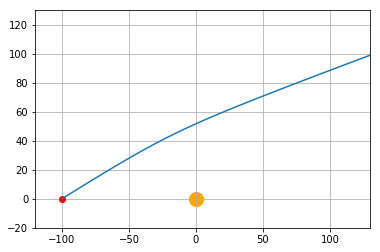

In [3]:
#Задание 2.1, траектория при заданных в задаче условиях
V0 = 0.0000000133692
DT = 3.3e8
N = 100
xlim_l = -120
ylim_l = -20
xlim_r = 130
ylim_r = 130
dynamic = False #переключатель на динамическое построение траектории

PLOT(V0, DT, N, xlim_l, ylim_l, xlim_r, ylim_r, dynamic)

Интервал погрешности координаты X: [0.0 %; 1.579 %]
Интервал погрешности координаты Y: [0.0 %; 2.679 %]


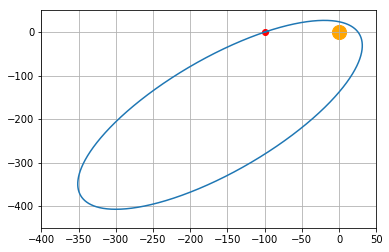

In [10]:
#Задание 2.2.1, эллипсоидная траектория при найденной начальной скорости
V0 = 3e-9+8e-10
DT = 6e7
N = 15600
xlim_l = -400
ylim_l = -450
xlim_r = 50
ylim_r = 50
dynamic = False #переключатель на динамическое построение траектории

PLOT(V0, DT, N, xlim_l, ylim_l, xlim_r, ylim_r, dynamic)

Интервал погрешности координаты X: [0.002 %; 2.617 %]
Интервал погрешности координаты Y: [0.0 %; 3.985 %]


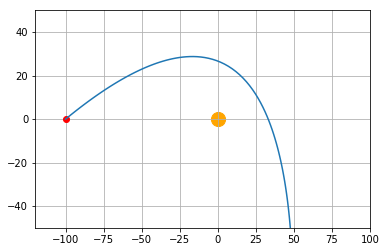

In [19]:
#Задание 2.2.2, гиперболоидная (примерно) траектория при найденной начальной скорости
V0 = 0.42e-8
DT = 3.3e8
N = 100
xlim_l = -120
ylim_l = -50
xlim_r = 100
ylim_r = 50
dynamic = False #переключатель на динамическое построение траектории

PLOT(V0, DT, N, xlim_l, ylim_l, xlim_r, ylim_r, dynamic)

Интервал погрешности координаты X: [0.0 %; 0.08 %]
Интервал погрешности координаты Y: [0.0 %; 1.0 %]


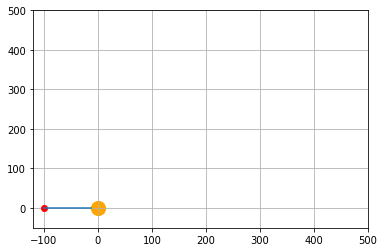

In [18]:
#Задание 2.2.3, линейная траектория при очень маленькой скорости до столкновения с Солнцем
#Если не учитывать то, что Солнце - не материальная точка, то комета полетит по бесконечной линии
V0 = 0.1e-12
DT = 3.3e8
N = 110
xlim_l = -120
ylim_l = -50
xlim_r = 500
ylim_r = 500
dynamic = False #переключатель на динамическое построение траектории

PLOT(V0, DT, N, xlim_l, ylim_l, xlim_r, ylim_r, dynamic)

Интервал погрешности координаты X: [0.0 %; 2.56 %]
Интервал погрешности координаты Y: [0.0 %; 1.0 %]


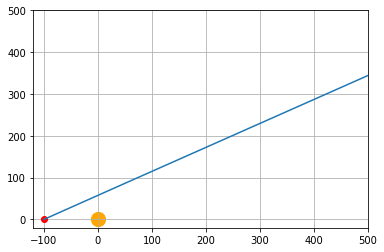

In [13]:
#Задание 2.2.4, линейная траектория при очень большой скорости
V0 = 0.0000001
DT = 5e6
N = 1400
xlim_l = -120
ylim_l = -20
xlim_r = 500
ylim_r = 500
dynamic = False #переключатель на динамическое построение траектории

PLOT(V0, DT, N, xlim_l, ylim_l, xlim_r, ylim_r, dynamic)

Интервал полученных площадей: [223.1646771722583; 227.99965222546865]
Интервал погрешности координаты X: [0.0 %; 1.579 %]
Интервал погрешности координаты Y: [0.0 %; 2.679 %]


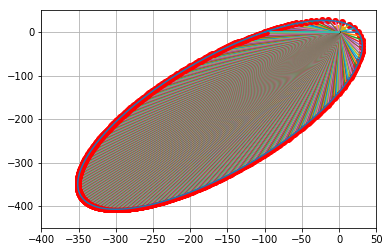

In [14]:
#2.3, продемонстрируем работу законов Кеплера на эллипсической траектории из 2.2.1
S = True
V0 = 3e-9+8e-10
DT = 6e7
N = 15600
xlim_l = -400
ylim_l = -450
xlim_r = 50
ylim_r = 50
each_point = 20

PLOT(V0, DT, N, xlim_l, ylim_l, xlim_r, ylim_r, False, S, each_point)

Интервал погрешности координаты X: [0.0 %; 1.579 %]
Интервал погрешности координаты Y: [0.0 %; 2.679 %]


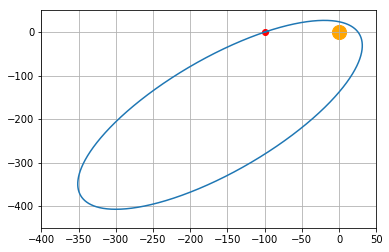

In [4]:
#Демонстрация 3-го закона Кеплера
V0 = 3e-9+8e-10
DT = 6e7
N = 15600
xlim_l = -400
ylim_l = -450
xlim_r = 50
ylim_r = 50
each_point = 20

X0 = -100
PLOT(V0, DT, N, xlim_l, ylim_l, xlim_r, ylim_r, False)

#X0 = -101
#V0 = 
#PLOT(V0, DT, N, xlim_l, ylim_l, xlim_r, ylim_r, False)